In [3]:
import nltk

In [4]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> I
Command 'I' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biolo

      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CE

In [10]:
messages = [line.rstrip() for line in open('/content/SMSSpamCollection')]

In [12]:
print(len(messages))

5574


In [13]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [14]:
for mess_no, message in enumerate(messages[:10]):
  print(mess_no, message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [27]:
import pandas as pd

messages = pd.read_csv('/content/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [28]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
messages.describe(include='all')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [30]:
messages.describe().transpose()

,count,unique,top,freq
label,5572,2,ham,4825
message,5572,5169,"Sorry, I'll call later",30


In [34]:
messages.groupby('label').describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [35]:
messages['length'] = messages['message'].apply(len)

In [36]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

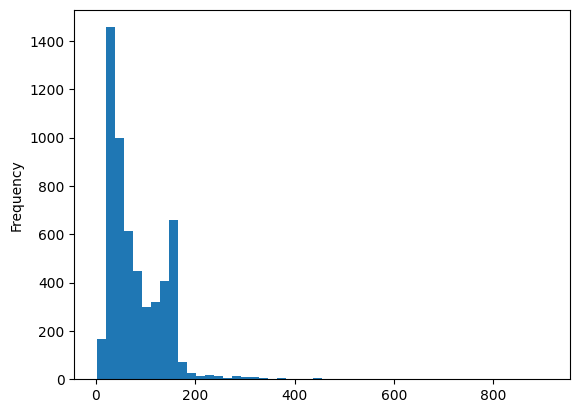

In [42]:
messages['length'].plot.hist(bins=50)

<Axes: xlabel='length', ylabel='Count'>

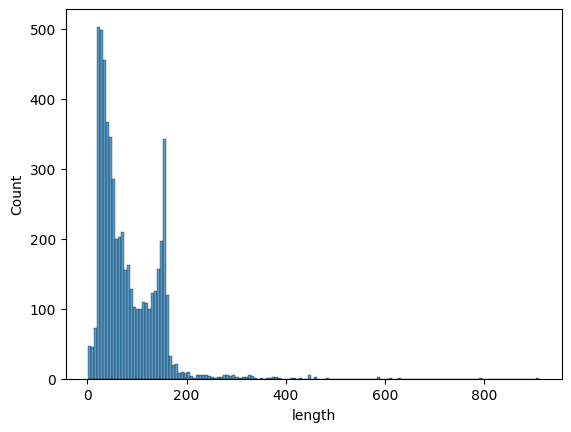

In [47]:
sns.histplot(x='length', data=messages, bins=150)

In [48]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [50]:
messages[messages['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [54]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

<Figure size 1200x400 with 0 Axes>

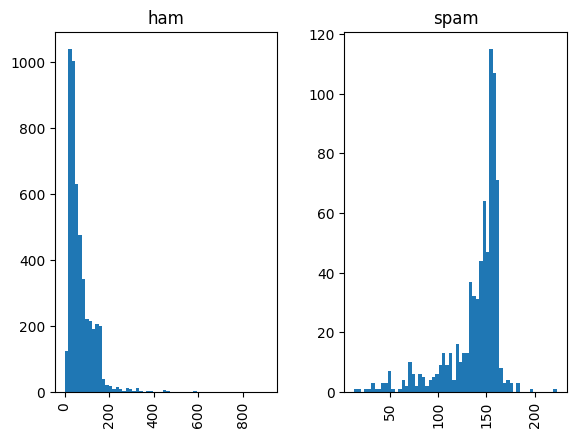

In [58]:
plt.figure(figsize=(12, 4))
messages.hist(column='length', by='label', bins=60)

<Axes: xlabel='length', ylabel='Count'>

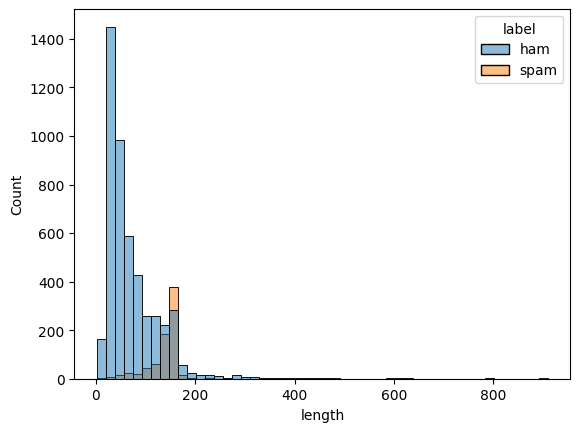

In [60]:
sns.histplot(x='length', data=messages, bins=50, hue='label')

In [61]:
import string

In [80]:
mess = 'Sample message! Notice: it has punctuation.'

In [81]:
nopunc = [c for c in mess if c not in string.punctuation]

In [82]:
from nltk.corpus import stopwords

In [83]:
nopunc = ''.join(nopunc)

In [84]:
nopunc

'Sample message Notice it has punctuation'

In [85]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [91]:
cleaned_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [92]:
cleaned_mess

['Sample', 'message', 'Notice', 'punctuation']

In [97]:
# words = nopunc.split()

# # Create a list to store non-stopwords
# filtered_words = []

# # Get a list of English stopwords
# english_stopwords = stopwords.words('english')

# # Iterate through the words and filter out stopwords
# for word in words:
#     if word.lower() not in english_stopwords:
#         filtered_words.append(word)

# # Join the filtered words to form a cleaned text
# cleaned_text = " ".join(filtered_words)

# print(cleaned_text)


In [94]:
def text_preocess(mess):
  nopunc = [char for char in mess if char not in string.punctuation]

  nopunc = ''.join(nopunc)

  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [96]:
messages['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [95]:
messages['message'].head().apply(text_preocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
bow_transformer = CountVectorizer(analyzer=text_preocess).fit(messages['message'])

In [139]:
messages_bow = bow_transformer.transform(messages['message'])

In [131]:
from sklearn.feature_extraction.text import TfidfTransformer

In [141]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [142]:
tfidf4 = tfidf_transformer.transform(bow4)

In [144]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [145]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [148]:
messages_tfidf

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [149]:
from sklearn.naive_bayes import MultinomialNB

In [151]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [157]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [159]:
from sklearn.model_selection import train_test_split

In [167]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2, random_state=101)

In [168]:
msg_train

1398    Then we wait 4 u lor... No need 2 feel bad lar...
1084    Wat makes some people dearer is not just de ha...
1086    FR'NDSHIP is like a needle of a clock. Though ...
2655                          Its sarcasm.. .nt scarcasim
1059    Tell me they're female :V how're you throwing ...
                              ...                        
4171    Mmmmmm ... I love you,so much, Ahmad ... I can...
599     Will do. Was exhausted on train this morning. ...
1361    Yo dude guess who just got arrested the other day
1547                Shant disturb u anymore... Jia you...
4959                     Why didn't u call on your lunch?
Name: message, Length: 4457, dtype: object

In [169]:
from sklearn.pipeline import Pipeline

In [170]:
pipeline = Pipeline([
                    ('bow', CountVectorizer(analyzer=text_preocess)),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', MultinomialNB())
                    ])

In [171]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preocess at 0x7bf6c8448550>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [174]:
predictions = pipeline.predict(msg_test)

In [175]:
from sklearn.metrics import classification_report

In [176]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       980
        spam       1.00      0.66      0.79       135

    accuracy                           0.96      1115
   macro avg       0.98      0.83      0.89      1115
weighted avg       0.96      0.96      0.95      1115

